In [2]:
import pandas as pd
import yellowbrick

In [3]:
#Step 1:  Load data into a dataframe
addr1 = "StudentsPerformance.csv"
data = pd.read_csv(addr1)

In [4]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (1000, 8)


In [5]:
#Step 3:  Look at the data
print(data.head(5))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none        72.0           72.0           74.0  
1               completed        69.0           90.0           88.0  
2                    none        90.0           95.0           93.0  
3                    none        47.0           57.0           44.0  
4                    none         NaN            NaN            NaN  


In [6]:
#Step 4:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
       math score  reading score  writing score
count  994.000000     995.000000     994.000000
mean    66.113682      69.194975      68.096579
std     15.173590      14.600521      15.199470
min      0.000000      17.000000      10.000000
25%     57.000000      59.000000      58.000000
50%     66.000000      70.000000      69.000000
75%     77.000000      79.000000      79.000000
max    100.000000     100.000000     100.000000
Summarized Data
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test preparation course  
count                     1000  
unique                       2  
top                       none  
freq                       642  


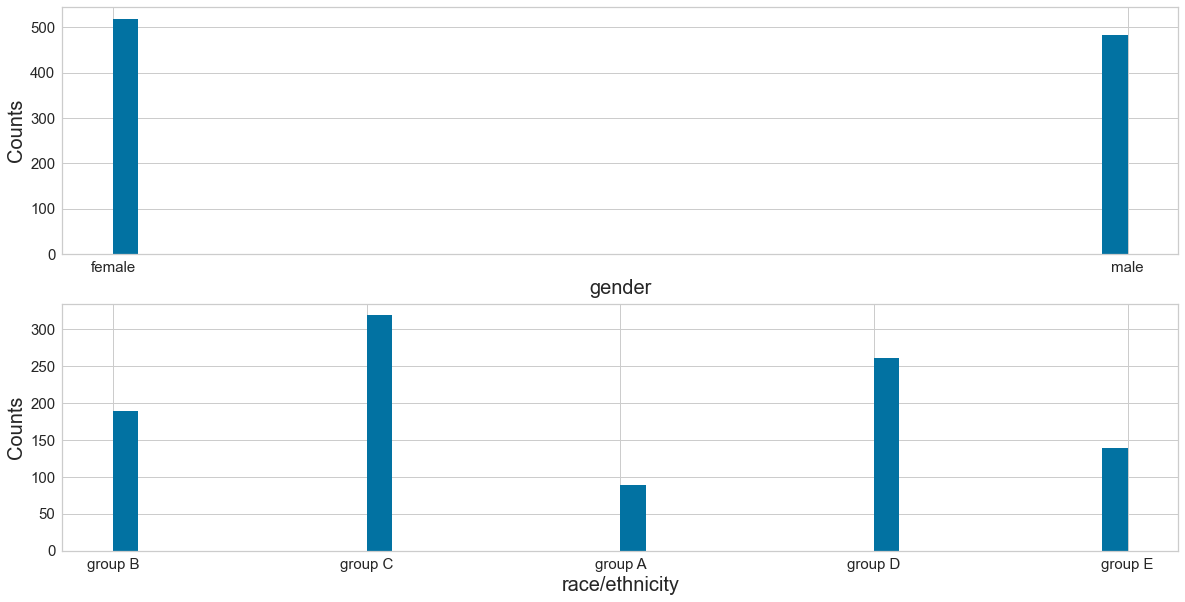

In [7]:
#Step 5: import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 1)

# Specify the features of interest
num_features = ['gender', 'race/ethnicity']
xaxes = num_features
yaxes = ['Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

As per the above graphs, the second graph shows it doesnt have the symmetrical data for the groups

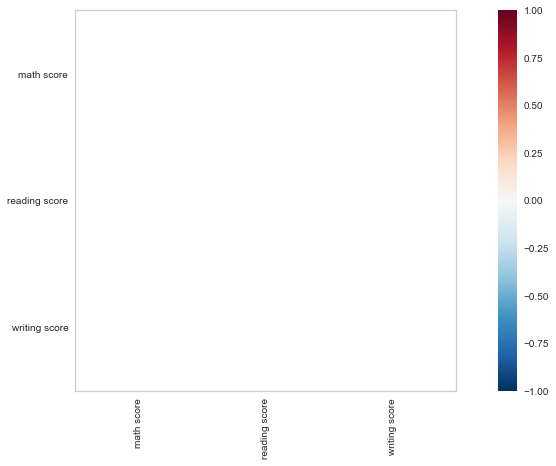

In [8]:
#Step 6: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D
num_features=['math score','reading score','writing score']

# extract the numpy arrays from the data frame
X = data[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.show()

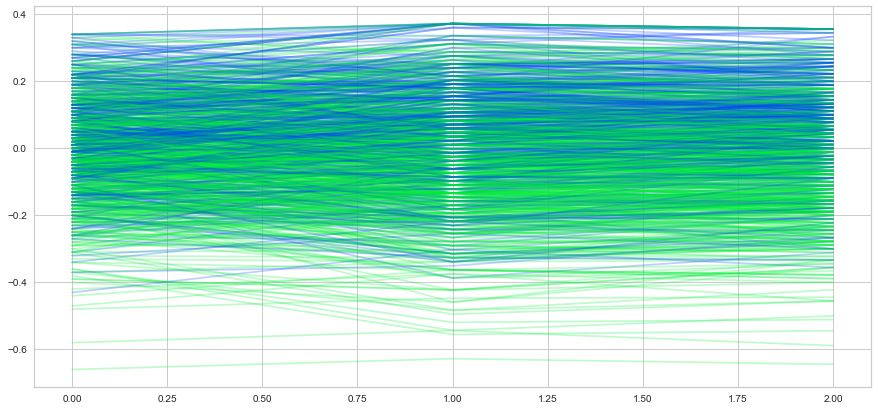

In [9]:
# Step 7:  Compare variables against Course completed ot not
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['none', 'completed']
num_features=['math score','reading score','writing score']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data['test preparation course'].values

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
plt.show();


### Dropping the feature of lunch which isnt require as it does not say anything abt what we wanted to acheive

In [28]:
# Step 8 - Specify the features of interest
num_features = ['gender','race/ethnicity','parental level of education','test preparation course','math score','reading score','writing score']
# extract the numpy arrays from the data frame
data_reqfeatures = data[num_features].copy()
print(data_reqfeatures.head(5))

   gender race/ethnicity parental level of education test preparation course  \
0  female        group B           bachelor's degree                    none   
1  female        group C                some college               completed   
2  female        group B             master's degree                    none   
3    male        group A          associate's degree                    none   
4    male        group C                some college                    none   

  math score reading score writing score  
0         72            72            74  
1         69            90            88  
2         90            95            93  
3         47            57            44  
4          0             0             0  


In [29]:
# Step 9 - fill in missing values and eliminate features
#fill the missing age data with median value
# fill with the most represented value
def fill_na_most(data_reqfeatures, inplace=True):
    return data.fillna(0, inplace=inplace)

fill_na_most(data_reqfeatures['math score'])
fill_na_most(data_reqfeatures['reading score'])
fill_na_most(data_reqfeatures['writing score'])

# check the result
print(data_reqfeatures['math score'].describe())
print(data_reqfeatures['reading score'].describe())
print(data_reqfeatures['writing score'].describe())

count     1000.0
unique      82.0
top         65.0
freq        36.0
Name: math score, dtype: float64
count     1000.0
unique      73.0
top         72.0
freq        34.0
Name: reading score, dtype: float64
count     1000.0
unique      78.0
top         74.0
freq        35.0
Name: writing score, dtype: float64


In [30]:
#Step 10 - convert categorical data to numbers
#get the categorical data
cat_features = ['test preparation course']
data_cat = data_reqfeatures[cat_features]
print(data_cat)
data_cat = data_cat.replace({'test preparation course': {'none': 0, 'completed': 1}})
print(data_cat)

    test preparation course
0                      none
1                 completed
2                      none
3                      none
4                      none
..                      ...
995               completed
996                    none
997               completed
998               completed
999                    none

[1000 rows x 1 columns]
     test preparation course
0                          0
1                          1
2                          0
3                          0
4                          0
..                       ...
995                        1
996                        0
997                        1
998                        1
999                        0

[1000 rows x 1 columns]
